# Part I - Exploratory Data Analysis (Loan Data From Prosper)
## by Oluwatobi Adebanwo 


## Introduction

This project contains exploratory data analysis of a [**Loan Data**](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000). 
Exploratory data analysis involves using Python data science and data visualization libraries to explore a dataset’s discoveries, variables and understand the data’s structure, oddities, patterns, and relationships.

The Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The [**data dictionary**](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the dataset. 
I will be using various visualizations to observe insights and trends into the dataset in Univariate, Bivariate and Multivariate Exploration.

## Preliminary Wrangling

In [1]:
# import all packages to be used for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import csv file of loan dataset using pandas
loan_data = pd.read_csv('prosperLoanData.csv')

### Overview of the dataset and description of its properties.

In [3]:
# data preview
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# no. rows and columns
loan_data.shape

(113937, 81)

In [5]:
# varaiable datatypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# data numerical statistics
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


This dataset contains 113,937 loans with 81 variables on each loan. Most variables are numeric in nature such as the Listing number, loan amount, borrower rate (or interest rate), borrower income, and many others. Some variables are in strings format such as the current loan status, employment status and others. 

What factors affect a loan outcome status.
What affects  the borrower's interest rate.

## Univariate Exploration
This Involves visualization of a single varaible or column from the dataset

### **Let's look at the Employment Status of Individuals collecting this Loan**

In [7]:
# define title, x & y axis labels to avoid repetition
def labels(a,b,c):
    return plt.title(a),plt.ylabel(b),plt.xlabel(c)

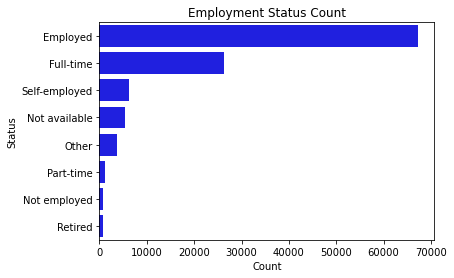

In [8]:
type_order = loan_data['EmploymentStatus'].value_counts().index
sb.countplot(data=loan_data, y='EmploymentStatus', color = 'blue', order=type_order)
labels('Employment Status Count','Status','Count');

As one would expect, the chart shows Employed persons shared the highest percentage of loan borrowers and Full-time persons at second. Retired and Not employed persons shared least percentage of loan borrowers.

### **Let's look at the Income Range of loan borrowers**

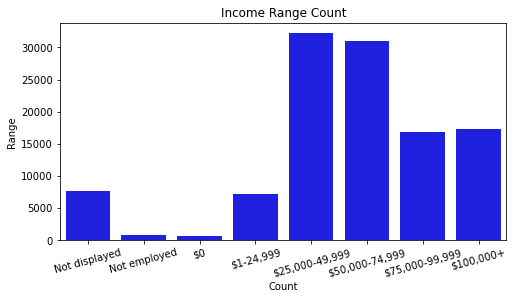

In [9]:
plt.figure(figsize=[8, 4])
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data=loan_data, x='IncomeRange', color = 'blue', order=order)
labels('Income Range Count','Range','Count')
plt.xticks(rotation = 15);

It can be seen that the highest income ranges from 25,000 dollars to 49,999 dollars with Not employed individuals having the little or no income. Some Income Ranges were not displayed.

### **Lets Look at the Occupation of the Borrowers**

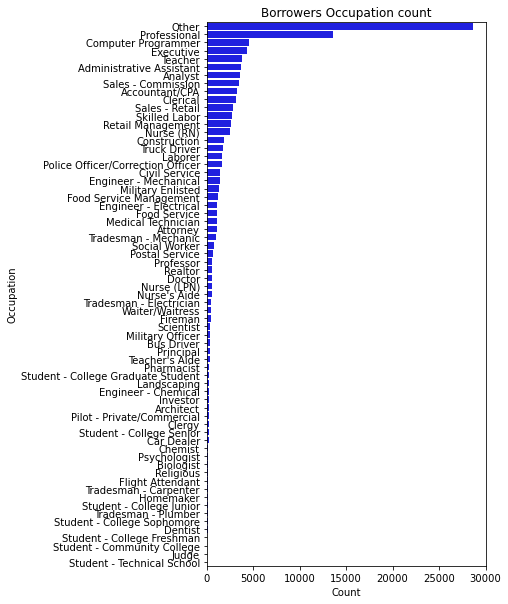

In [10]:
plt.figure(figsize=[5, 10])
type_order = loan_data['Occupation'].value_counts().index
sb.countplot(data=loan_data, y='Occupation', color = 'blue', order=type_order)
labels('Borrowers Occupation count','Occupation','Count');

> A very large amount of borrowers chose 'Other' has their occupation. Th chart further shows that Professionals, Computer Programmer, Executives had part of the highest loan borrwoer's with Architect, Dentist, Psychologist amongst others had a very low turn out in Loan borrowers'.

### **We will look at the verified income of Loan borrowers**

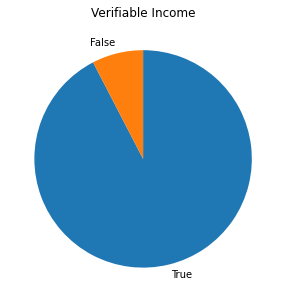

In [11]:
# income verified
plt.figure(figsize=[8, 5])
verifiableincome = loan_data['IncomeVerifiable'].value_counts()
plt.pie(verifiableincome, labels = verifiableincome.index, startangle = 90, counterclock = False)
plt.title('Verifiable Income');

The chart shows that a very high percentage of income of loan borrowers were verified comapred to not verified income.

### **A look at an overview of Loan amount collected by persons over this period**

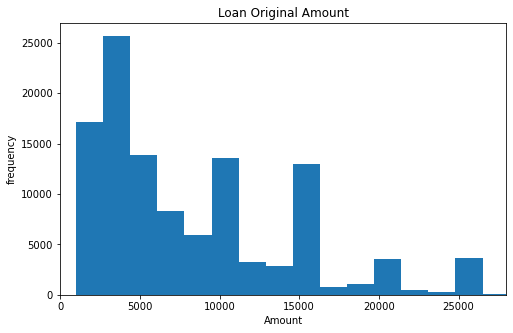

In [12]:
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins=20)
plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Loan Original Amount')
plt.xlim(0,28000);

It shows that loan original amount is right skewed with most loan collected ranging from 0 to 5000 dollars and decreasing upwards to 25000 dollars. About more than 3000 records of loan of $25000.

### **Let's look at Duration of all loans In years**

In [13]:
# since we have 3 unique variables describing loan Term in months, we can covert them to years, 12 to 1 yr, 36 to 2yrs. e.t.c
loan_data.replace(to_replace= {'Term': {12: '1yr', 36: '3yrs', 60:'5yrs'}}, inplace = True)

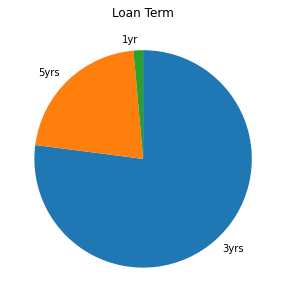

In [14]:
plt.figure(figsize=[8, 5])
loan_duration = loan_data['Term'].value_counts()
plt.pie(loan_duration, labels = loan_duration.index, startangle = 90, counterclock = False)
plt.title('Loan Term');

From the pie chart, we can see that most length of loan covered a 3 year deal with 5 years coming second and very few loan covered a 1 year deal. 

### **We'll take a Look at the Status of Loans**

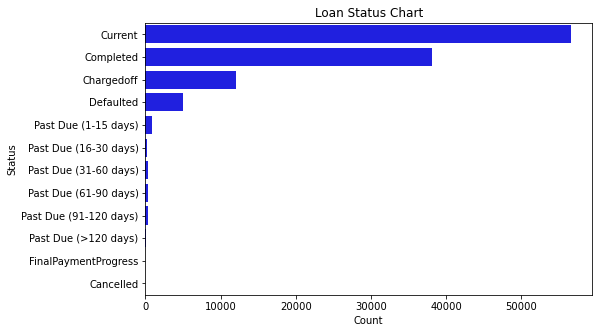

In [15]:
plt.figure(figsize=[8, 5])
order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 
         'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
         'Past Due (>120 days)', 'FinalPaymentProgress', 'Cancelled']
sb.countplot(data=loan_data, y='LoanStatus', color = 'blue', order=order)
labels('Loan Status Chart','Status','Count');

From the Visualization above, majority of the Loan are still in Current status. Although, a higher percentage of the loan have been charged off. Charge-off means the lender or creditor has written the account off as a loss, and the account is closed to future charges. Over 1000 loans are defaulted, these are failure to repay a loan according to the terms agreed to in the promissory note. A large amount of the Loan have also been completed with very few loans that are Past Due

### **Score Rating by Prosper loan**

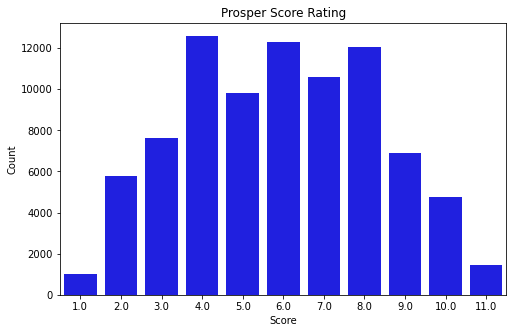

In [16]:
plt.figure(figsize=[8, 5])
type_order = loan_data['ProsperScore'].value_counts().index
sb.countplot(data=loan_data, x='ProsperScore', color = 'blue')
labels('Prosper Score Rating','Count','Score');

This visualization shows us that most borrowers score rating fall within 4-8 and borrowers with the high risk score 10 are the lowest population. Also score rating of 1 have the lowest population of borrowers. Score Rating 11 are probabaly data rows that should be dropped , as Prosper Score ratings range from 1 - 10.

### **Lets Look at State Location of Borrower's**

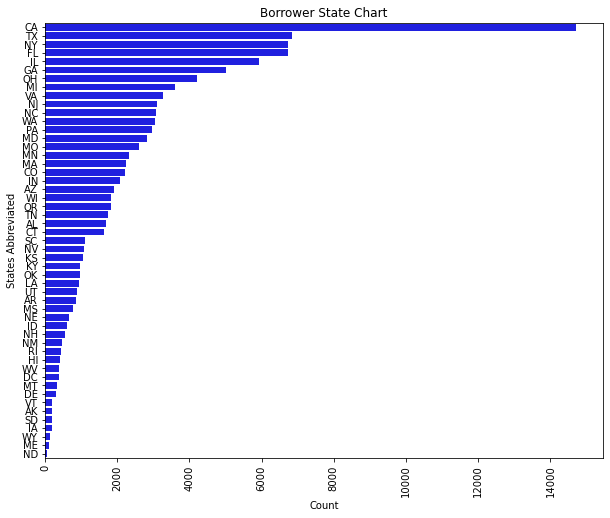

In [17]:
plt.figure(figsize=[10, 8])
type_order = loan_data['BorrowerState'].value_counts().index
sb.countplot(data=loan_data, y='BorrowerState', color = 'blue', order=type_order)
plt.xticks(rotation=90)
labels('Borrower State Chart','States Abbreviated','Count');

The above visulization shows the states borrowers come from. It can be observed that Chicago(CA) had the hightest population of borrowers with Texas(TX), New York(NY) and Florida(FL) having roughly the same number of borrowers'. States like Wyoming(WY), Maine(ME) amongst others have a very low population of borrowers.

### **We will Look at the Investors variable**

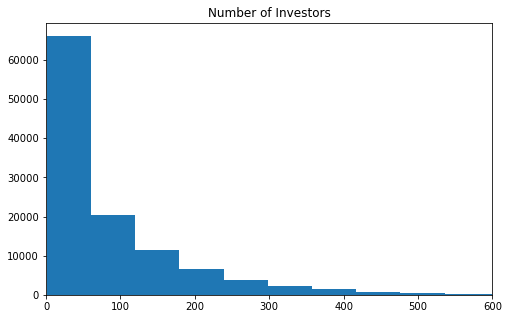

In [18]:
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'Investors', bins=20)
plt.title('Number of Investors')
plt.xlim(0,600);

This chart is skewed to the right showing most investors range from 0 to 100 with very few from 300 investors upwards

### **Monthly Loan Payment by Borrowers**

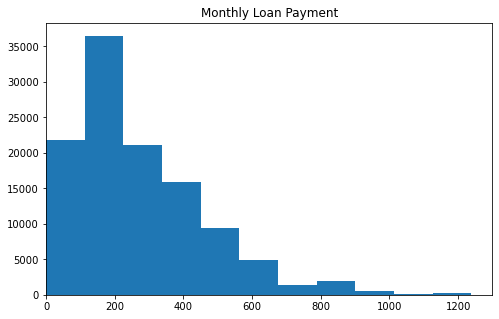

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'MonthlyLoanPayment', bins=20)
plt.title('Monthly Loan Payment')
plt.xlim(0,1300);

This Chart shows that majority of Loan Borrowers paid around 150 dollars to 250 dollars monthly. The chart is rightly skewed

## Bivariate Exploration

In this section, I'll investigate relationships between pairs of variables in the
data.

### **Let's look at the Relationship between Income range and Income Verified data**

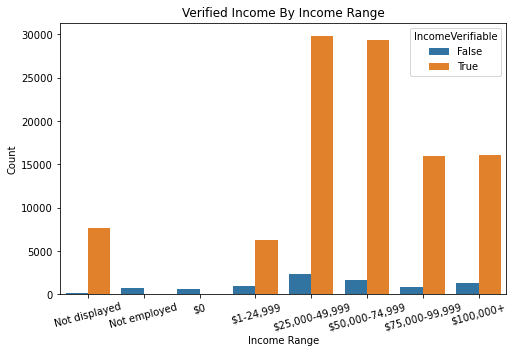

In [20]:
plt.figure(figsize=[8, 5])
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data = loan_data, x = 'IncomeRange', hue = 'IncomeVerifiable', order = order)
labels('Verified Income By Income Range','Count','Income Range')
plt.xticks(rotation=15);

The Visualization aboves shows us that each Range of Income had mininal Unverified Income compared to the Verified Income of Borrowers, with income range of 25,000 - 49,999 dollars having the highest record of Unverified Income.

### **Let's look at the relationship between Income Range and Home owners**

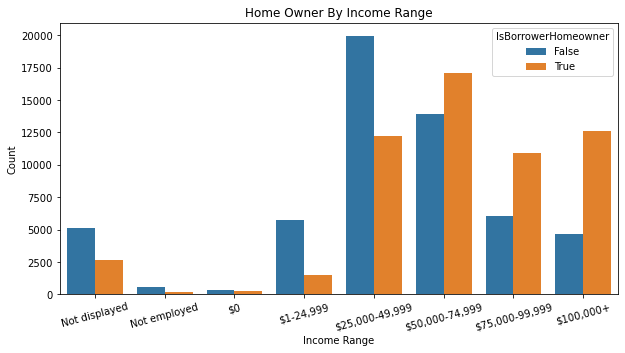

In [21]:
plt.figure(figsize=[10, 5])
order = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sb.countplot(data = loan_data, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order = order)
labels('Home Owner By Income Range','Count','Income Range')  
plt.xticks(rotation=15);

From the Chart. It is observed that Borrowers with Higher Income tend to be Home owners. Income earners of 100,000 dollars and more are very likely to be Home owners. This trend continues for low Income earners which are less likely to be Home owners.

### **We will look into Loan amount and Year**

In [22]:
# convert loan origination date column to datetime format using pandas and create new colummn 'LoanOriginationYear'
date_col = pd.DatetimeIndex(loan_data['LoanOriginationDate'])
loan_data['LoanOriginationYear'] = date_col.year

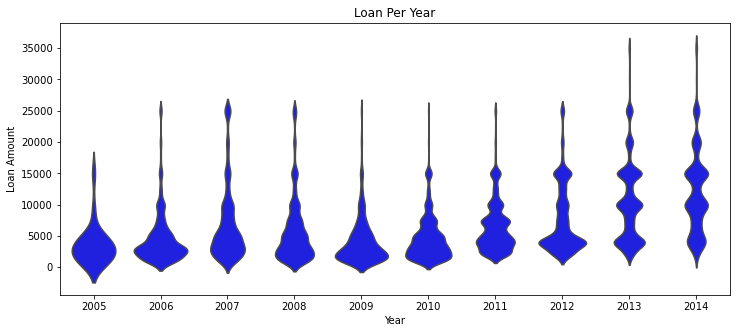

In [23]:
plt.figure(figsize=[12, 5])
sb.violinplot(data=loan_data, x='LoanOriginationYear', y='LoanOriginalAmount', color= 'blue', inner=None)
labels('Loan Per Year','Loan Amount','Year');

From the violin plot above, year 2006 and 2009 had more data points where the plot is wider, i.e around 2500 to 3500 dollars.
Generally from the chart loan amount accross years ranges from 0 to 5000 dollars, but in years 2013 and 2014 loan borrowed dropped. Loans from 15,000 dollars above were few.

## Multivariate Exploration

This exploartion invloves Creating plots of three or more variables to investigate the data even further. 

### **We shall compare loan amount and monthly payment over each loan duration**

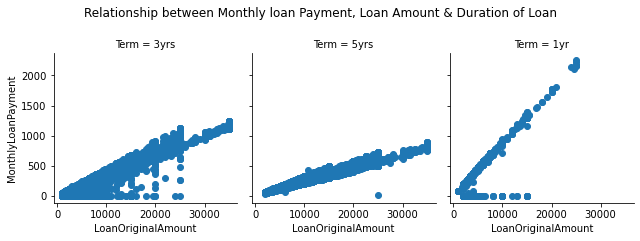

In [26]:
g = sb.FacetGrid(data = loan_data, col = 'Term',)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment',)
plt.suptitle('Relationship between Monthly loan Payment, Loan Amount & Duration of Loan', y = 1.1);

This visualization shows that most loans were collected over a period of 3 years with lower monthly payment compared to loans collected over a 1 year deal that had higher monthly loan payement.
Generally, Monthly Loan Payment Increases with Loan original amount

### **Let's Look at the Relationships between  3 variables, Loan amount, monthly payment and Investors.**

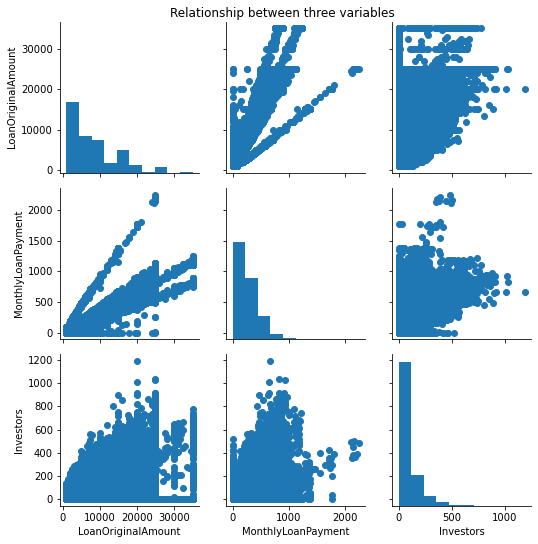

In [33]:
g = sb.PairGrid(data = loan_data, vars = ['LoanOriginalAmount', 'MonthlyLoanPayment','Investors'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.suptitle('Relationship between three variables', y = 1);

Generally, Monthly loan payment increased with loan amount borrowed and from the charts relationship with investors and loan original amount, it can be seen that Most investors were around 0 to 500 with few from 500 upwards and loan amount mostly around 2000 dollars downwards.

## Observations & Conclusions
Generally, The Income of loan borrowers affected loan amount across the Years. Loan reduced from 2012 to 2014, With most loans from the previous years ranging from 1,000 dollars to 3,000 dollars. 

## **Thank You**